## Exploring College Education and Salaries

Hypothesis: There is a correlation between Salaries, academic major taken and type of college attended. 

1. Which degrees show the most growth in salary from starting to mid-career?
2. What are the top 30 schools by mid career median salary?
3. How do salaries differ by degree?
4. Is there any correlation between starting salary and mid-career salary? If so, what is the    Pearson correlation coefficient? 


In [1]:
# Import Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
%matplotlib inline
from config import credentials_file

## Load Project Data

In [2]:
# Get data files and read into a pandas dataframe
degrees_data = ("Resources/degrees-that-pay-back .csv")
college_data = "Resources/salaries-by-college-type.csv"
region_data = "Resources/salaries-by-region.csv"
#with open("Resources/costOfAttendence.csv", encoding="utf8", errors='ignore') as cost_data:
cost_data = "Resources/costOfAttendence.csv"
# load colleges by state data

# Read the mouse data and the study results into a pandas dataframe
degrees_data = pd.read_csv(degrees_data)
college_data = pd.read_csv(college_data)
region_data = pd.read_csv(region_data)
cost_data = pd.read_csv(cost_data)
#degrees_data.head()
#college_data.head
#cost_data.head()
#college_data.head()
#region_data.head()


In [3]:
# delete the extra column 
del cost_data['Unnamed: 3']
cost_data.head()

,School Name,Cost 2015,Cost 2014
0,Adelphi University,"$47,110","$45,200"
1,Aerosim Flight Academy,"$82,824","$82,824"
2,Agnes Scott College,"$47,323","$45,691"
3,Alaska Pacific University,"$43,180","$43,180"
4,Albertus Magnus College,"$47,302","$46,528"


In [4]:
# # Merge college data and region data dataframes
merged_data = pd.merge(region_data,cost_data, how = 'left', left_on = 'School Name', right_on = 'School Name')
#merged_data = pd.merge(region_data,cost_data, how='left', on=('School Name'))
#                 'Starting Median Salary',
#                 'Mid-Career Median Salary',
#                 'Mid-Career 10th Percentile Salary',
#                 'Mid-Career 25th Percentile Salary',
#                 'Mid-Career 75th Percentile Salary',
#                 'Mid-Career 90th Percentile Salary'])
merged_data.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Cost 2015,Cost 2014
0,Adelphi University,NY,Northeastern,"$40,600.00","$79,200.00","$44,200.00","$54,800.00","$114,000.00","$160,000.00","$47,110","$45,200"
1,"American University, Washington D.C.",DC,Southern,"$45,300.00","$90,800.00","$45,200.00","$62,400.00","$134,000.00","$169,000.00",NaN,NaN
2,Amherst College,MA,Northeastern,"$54,500.00","$107,000.00",NaN,"$84,900.00","$162,000.00",NaN,"$61,544","$59,060"
3,Appalachian State University,NC,Southern,"$40,400.00","$69,100.00","$37,200.00","$50,400.00","$90,800.00","$115,000.00","$44,018","$43,457"
4,Arizona State University,AZ,Western,"$47,400.00","$84,100.00","$44,600.00","$60,700.00","$114,000.00","$163,000.00","$42,363","$41,497"


In [5]:
# Determine the shape of the data, how many rows and columns
merged_data.shape

(323, 11)

## Data Cleaning

In [6]:
# review data information to see the type of data, columns with missing values
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        323 non-null    object
 1   State                              323 non-null    object
 2   Region                             323 non-null    object
 3   Starting Median Salary             323 non-null    object
 4   Mid-Career Median Salary           323 non-null    object
 5   Mid-Career 10th Percentile Salary  276 non-null    object
 6   Mid-Career 25th Percentile Salary  323 non-null    object
 7   Mid-Career 75th Percentile Salary  323 non-null    object
 8   Mid-Career 90th Percentile Salary  276 non-null    object
 9   Cost 2015                          148 non-null    object
 10  Cost 2014                          148 non-null    object
dtypes: object(11)
memory usage: 30.3+ KB


In [7]:
# get an overview of the table statistics to see what needs to be cleaned
#merged_data.describe()

In [8]:
# determine which columns have missing values, method 1
#merged_data.columns[merged_data.isnull().any()].tolist() 

In [9]:
# determine which columns have missing values, method 2
#merged_data.loc[:, merged_data.isnull().any()]

In [10]:
# count the number of missing values
#combined_merged_data.isnull().sum()
#combined_merged_data.head()  

In [11]:
##covert data columns to numerical values in order to perform analysis on the data
# for multiple columns, put them in a list like so:
#cols = ['col1', 'col2', ..., 'colN']

cols = ['Starting Median Salary', 
        'Mid-Career Median Salary',
        'Mid-Career 10th Percentile Salary',
        'Mid-Career 25th Percentile Salary',
        'Mid-Career 75th Percentile Salary',
        'Mid-Career 90th Percentile Salary',
        'Cost 2015', 'Cost 2014']
merged_data[cols] = merged_data[cols].astype(str)

# pass them to df.replace(), specifying each char and it's replacement:
merged_data[cols] = merged_data[cols].replace({'\$': '', ',': '', '%': ''}, regex=True)
merged_data[cols] = merged_data[cols].astype(float)
merged_data.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Cost 2015,Cost 2014
0,Adelphi University,NY,Northeastern,40600.0,79200.0,44200.0,54800.0,114000.0,160000.0,47110.0,45200.0
1,"American University, Washington D.C.",DC,Southern,45300.0,90800.0,45200.0,62400.0,134000.0,169000.0,NaN,NaN
2,Amherst College,MA,Northeastern,54500.0,107000.0,NaN,84900.0,162000.0,NaN,61544.0,59060.0
3,Appalachian State University,NC,Southern,40400.0,69100.0,37200.0,50400.0,90800.0,115000.0,44018.0,43457.0
4,Arizona State University,AZ,Western,47400.0,84100.0,44600.0,60700.0,114000.0,163000.0,42363.0,41497.0


## Data Manipulation

In [12]:
#create a dataframe for the data i want to analyze
regionSalary_df = merged_data.loc[:,['School Name','State','Region','Starting Median Salary',
                'Mid-Career Median Salary','Cost 2014','Cost 2015']] 
regionSalary_df.head(10)

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,Adelphi University,NY,Northeastern,40600.0,79200.0,45200.0,47110.0
1,"American University, Washington D.C.",DC,Southern,45300.0,90800.0,NaN,NaN
2,Amherst College,MA,Northeastern,54500.0,107000.0,59060.0,61544.0
3,Appalachian State University,NC,Southern,40400.0,69100.0,43457.0,44018.0
4,Arizona State University,AZ,Western,47400.0,84100.0,41497.0,42363.0
5,Arkansas State University,AR,Southern,38700.0,63300.0,28068.0,29509.0
6,Auburn University,AL,Southern,45400.0,84700.0,40458.0,40458.0
7,Austin Peay State University,TN,Southern,37700.0,59200.0,46097.0,47625.0
8,Ball State University,IN,Midwestern,39100.0,64500.0,NaN,NaN
9,Bates College,ME,Northeastern,47300.0,96500.0,59285.0,61000.0


In [13]:

# cols = ['Starting Median Salary', 
#         'Mid-Career Median Salary',
#         'Mid-Career 10th Percentile Salary',
#         'Mid-Career 25th Percentile Salary',
#         'Mid-Career 75th Percentile Salary',
#         'Mid-Career 90th Percentile Salary',
#         ]
# college_data[cols] = college_data[cols].replace({'\$': '', ',': '', '%': ''}, regex=True)
# college_data[cols] = college_data[cols].astype(float)

# college_data.head()

In [14]:
# # What are the resulting distributions for starting and mid-career salaries by college?

# figure1 = sns.distplot(college_data[('Starting Median Salary')], bins=20, color='green', \
#              label='Starting Median Salary')

# sns.distplot(college_data[('Mid-Career Median Salary')], bins=20, color='red', \
#              label='Mid-Career Median Salary')
# plt.legend()
# sns.despine()




# # plt.show()

In [15]:
#regionSalary_df.describe()

In [16]:
# Analysis: Starting Median Salary for college graduates is around  $46,000, 
#  by mid career avarage is about $84,000
#  average cost of college in 2015 was $55,000. 
# Assumption all other factors being equal- it is true these numbers will vary depending on college major and other factors.. 


In [17]:
#sort values by starting median salary, so that our graph will be in order
regionSalary_df.sort_values(by = 'Starting Median Salary', ascending = False, inplace=True)
regionSalary_df.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
23,California Institute of Technology,CA,California,75500.0,123000.0,56382.0,58755.0
108,Massachusetts Institute of Technology,MA,Northeastern,72200.0,126000.0,NaN,NaN
83,Harvey Mudd College,CA,California,71800.0,122000.0,60613.0,63860.0
178,Stanford University,CA,California,70400.0,129000.0,58846.0,60749.0
147,Princeton University,NJ,Northeastern,66500.0,131000.0,54780.0,55832.0


In [18]:
# create new index
regionSalary_df.reset_index(drop=True, inplace=True)
regionSalary_df.head(10)

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,California Institute of Technology,CA,California,75500.0,123000.0,56382.0,58755.0
1,Massachusetts Institute of Technology,MA,Northeastern,72200.0,126000.0,NaN,NaN
2,Harvey Mudd College,CA,California,71800.0,122000.0,60613.0,63860.0
3,Stanford University,CA,California,70400.0,129000.0,58846.0,60749.0
4,Princeton University,NJ,Northeastern,66500.0,131000.0,54780.0,55832.0
5,Rice University,TN,Southern,64000.0,110000.0,52242.0,54291.0
6,Harvard University,MA,Northeastern,63400.0,124000.0,57050.0,59950.0
7,Polytechnic University of New York -Brooklyn,NY,Northeastern,62400.0,114000.0,NaN,NaN
8,Cooper Union,NY,Northeastern,62200.0,114000.0,NaN,NaN
9,Carnegie Mellon University,PA,Northeastern,61800.0,111000.0,59710.0,62032.0


In [19]:
# median salaries of the Top 30 schools
TOPschoolsSalary_df=regionSalary_df.loc[0:29,:] 
TOPschoolsSalary_df

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,California Institute of Technology,CA,California,75500.0,123000.0,56382.0,58755.0
1,Massachusetts Institute of Technology,MA,Northeastern,72200.0,126000.0,NaN,NaN
2,Harvey Mudd College,CA,California,71800.0,122000.0,60613.0,63860.0
3,Stanford University,CA,California,70400.0,129000.0,58846.0,60749.0
4,Princeton University,NJ,Northeastern,66500.0,131000.0,54780.0,55832.0
5,Rice University,TN,Southern,64000.0,110000.0,52242.0,54291.0
6,Harvard University,MA,Northeastern,63400.0,124000.0,57050.0,59950.0
7,Polytechnic University of New York -Brooklyn,NY,Northeastern,62400.0,114000.0,NaN,NaN
8,Cooper Union,NY,Northeastern,62200.0,114000.0,NaN,NaN
9,Carnegie Mellon University,PA,Northeastern,61800.0,111000.0,59710.0,62032.0


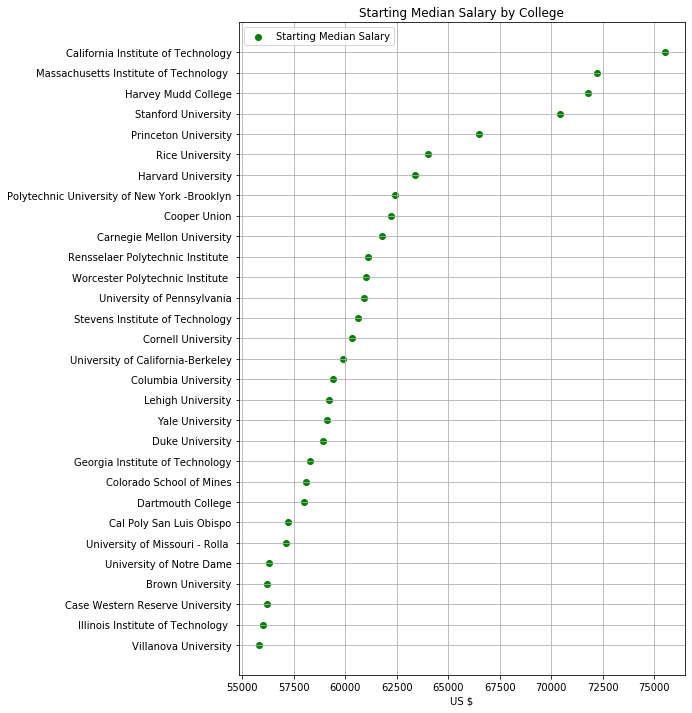

In [20]:
# create graph to show the median starting salary of the top 30 Colleges
# flip the graph to accomodate the school names along the Y axis

fig = plt.figure(figsize=(8,12))
x = TOPschoolsSalary_df['Starting Median Salary'] #switch x and y labels
y = TOPschoolsSalary_df.index
# invert the y axis to show from lowest to highest.
y=[len(y)-i for i in TOPschoolsSalary_df.index]
labels = TOPschoolsSalary_df['School Name']


plt.scatter(x, y, color='g', label = 'Starting Median Salary') 
plt.yticks(y, labels)

plt.xlabel('US $')
plt.ylabel('') #hide label
plt.title('Starting Median Salary by College')
plt.legend(loc=2)
plt.grid()
plt.savefig('Figures/Starting Median vs salary.png')
            
plt.show()           

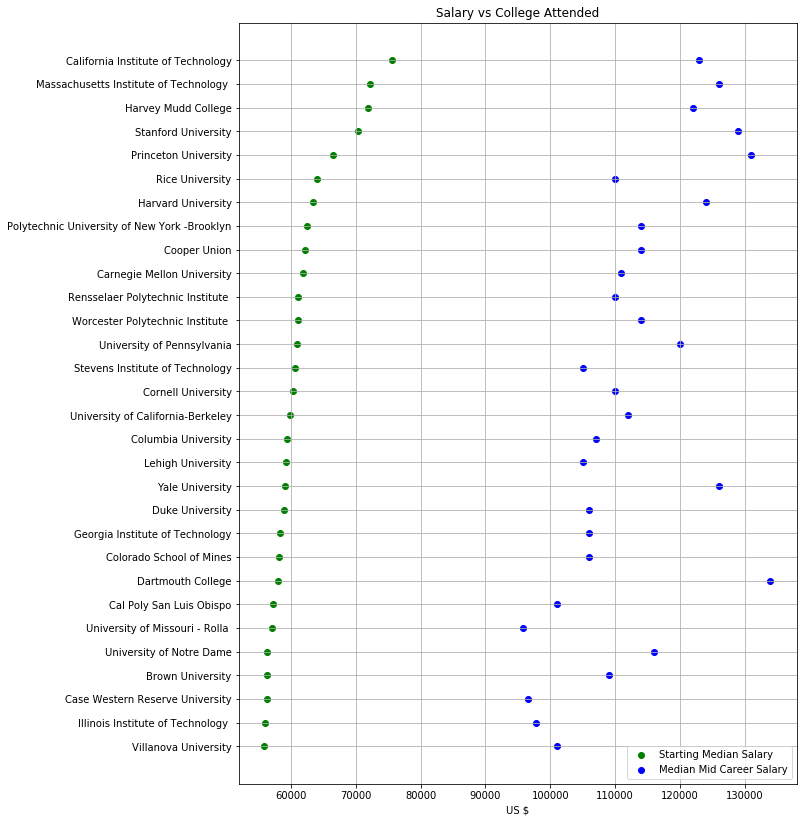

In [21]:
# plotting the Mid Career salaries

fig = plt.figure(figsize=(10,14))
x = TOPschoolsSalary_df['Starting Median Salary'] #switch x and y labels
y=[len(y)-i for i in TOPschoolsSalary_df.index]
#y=len(y)-TOPschoolsSalary_df.index

labels = TOPschoolsSalary_df['School Name']

plt.scatter(x, y, color='g', label = 'Starting Median Salary') 
plt.yticks(y, labels)

x2 = TOPschoolsSalary_df['Mid-Career Median Salary']
plt.scatter(x2, y, color='b', label = 'Median Mid Career Salary')

plt.xlabel('US $')
plt.ylabel('')
plt.title('Salary vs College Attended')
plt.legend(loc=4) #move the legend

# Turn on the grid
plt.grid()

# x3 = TOPschoolsSalary_df['Cost 2015']
# plt.scatter(x3, y, color='r', label = 'Cost 2015')

# plt.xlabel('US $')
# plt.ylabel('')
# plt.title('Salary Information by College')
# plt.legend(loc=2) #move the legend

plt.savefig('Figures/Starting&Mid carreer vs salary.png')
plt.show()


In [22]:
#Setting up to use Plotly API within Jupyter notebook
# #Step1.  import required libraries:
# import numpy as np
# import pandas as pd

# # #Std plotly tools
# import chart_studio.plotly
# #import plotly.plotly as py -this module created -ImportError: The plotly.plotly module is deprecated, advised
# # to use chart_studio.plotly instead
# import plotly as py
# import plotly.graph_objs as go


In [23]:
#Step2. Set credentials using the set credential function
#plotly.tools.set_credentials_file

In [24]:
regionSalary_df.head()

,School Name,State,Region,Starting Median Salary,Mid-Career Median Salary,Cost 2014,Cost 2015
0,California Institute of Technology,CA,California,75500.0,123000.0,56382.0,58755.0
1,Massachusetts Institute of Technology,MA,Northeastern,72200.0,126000.0,NaN,NaN
2,Harvey Mudd College,CA,California,71800.0,122000.0,60613.0,63860.0
3,Stanford University,CA,California,70400.0,129000.0,58846.0,60749.0
4,Princeton University,NJ,Northeastern,66500.0,131000.0,54780.0,55832.0


In [25]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from  plotly.offline import plot
from config import credentials_file


In [33]:
#import pandas as pd
import config 

username = 'username'
api_key = 'api_key' 

for col in regionSalary_df.columns:
    regionSalary_df[col] = regionSalary_df[col].astype(str)

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

regionSalary_df['text'] ='States'+ regionSalary_df['State'] + '<br>' + \
    ' Starting Median Salary ' + regionSalary_df['Starting Median Salary'] +'<br>' + \
    ' Mid-Career Median Salary ' + regionSalary_df['Mid-Career Median Salary'] #+ '<br>' + \

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = regionSalary_df['State'],
    z = regionSalary_df['Cost 2015'].astype(float),
    locationmode = 'USA-states',
    text = regionSalary_df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "USD")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2015 Cost of Attending College by States vs Salary<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)
# plotly.tools.set_credentials_file(username=’YourAccountName’, api_key=’YourAPIKey’)
fig = go.Figure(data = data, layout = layout)
py.sign_in(username='username', api_key='api_key')
py.iplot(fig, filename = 'd3-cloropleth-map')
plt.savefig('Figures/d3-cloropleth-map.png')
py.iplot(fig, filename = 'd3-cloropleth-map')

<Figure size 432x288 with 0 Axes>